In [ ]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

## Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Classification Metrics
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

## Set global scikit-learn configuration 
from sklearn import set_config

## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

from IPython.core.display import clear_output

In [ ]:
## Evaluation function
def evluate_classification(model,X_train,X_test,y_train,y_test):
    """Uses model.score to display the accuracy scores for training and test splits"""
    print(f"Training Accuracy: {model.score(X_train, y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test, y_test):.3f}")

In [ ]:
df = pd.read_csv('/wisconsinBreastCancer - wisconsinBreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") # or 'object'

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Inspect categorical columns for errors
cat_cols = make_column_selector(dtype_include='object')(df)
for col in cat_cols:
  display(df[col].value_counts(normalize=True))

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### a) Start by creating and evaluating a default logistic regression model using appropriate metrics and a confusion matrix.

In [ ]:
## Define features (X) and target (y)
target = 'diagnosis'

X = df.drop(target, axis=1)
y = df[target]
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
## Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
## Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
## Create tuples
number_tuple = (scaler, num_selector)
category_tuple = (ohe, cat_selector)

In [ ]:
## Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='drop')

In [ ]:
## Create an instance of the model
log_reg = LogisticRegression()
## Create a model pipeline
log_reg_pipe = make_pipeline(preprocessor, log_reg)
## Fit the model
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f106cde24c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f106ce49310>)])),
                ('logisticregression', LogisticRegression())])

In [ ]:
## Save the model's predictions for the train dataset
log_reg_train_preds = log_reg_pipe.predict(X_train)
## Save the model's predictions for the test dataset
log_reg_test_preds = log_reg_pipe.predict(X_test)

In [ ]:
## print the classification reports
print('Train Report')
print(classification_report(y_train, log_reg_train_preds))

print('Test Report')
print(classification_report(y_test, log_reg_test_preds))

Train Report
              precision    recall  f1-score   support

           B       0.99      1.00      0.99       268
           M       0.99      0.97      0.98       158

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426

Test Report
              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



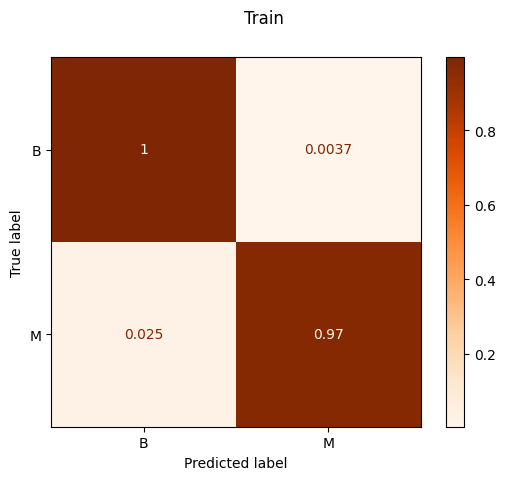

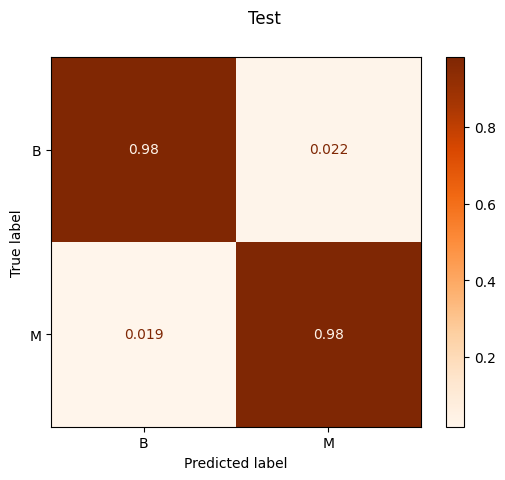

In [ ]:
## create confusion matrices
ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_preds, 
               normalize='true', cmap='Oranges')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_preds, 
               normalize='true', cmap='Oranges')
plt.suptitle('Test');

b) Then, use GridSearchCV to tune the penalty type and C values (inverse regularization strength) for the model to find the optimal combination of hyperparameter values, and evaluate the resulting tuned model.
NOTE: Make sure to select an appropriate solver that would allow you to explore both L1 and L2 penalties. In order to choose the right solver, [LogisticRegression documentation]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to see which solvers support which penalty types.

When you create your parameter dictionary:

Your penalties should be ['l1', 'l2'] Your C values should be logarithmic: [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]

In [ ]:
#logreg.get_params()
#logreg.param_grid = {}
#dt_grid_search = GridSearchCV(logreg, logreg.param_grid)
#dt_grid_search.fit(X_train, y_train)
#dt_grid_search.best_params_

params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
logreg = LogisticRegression(solver='liblinear')
gs = GridSearchCV(logreg, params)
gs.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']})

In [ ]:
gs.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [ ]:
gs.best_params_

{'C': 100, 'penalty': 'l1'}

In [ ]:
logreg_best_model = gs.best_estimator_
logreg_best_model.fit(X_train, y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [ ]:
evluate_classification(logreg_best_model, X_train, X_test, y_train, y_test)

Training Accuracy: 0.988
Test Accuracy: 0.965


### c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

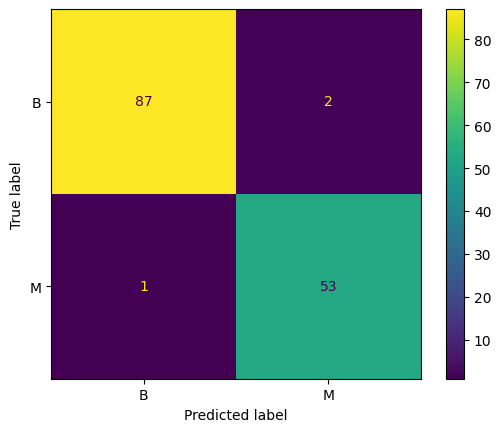

In [ ]:
# on default logreg
default_pred = logreg_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, default_pred);

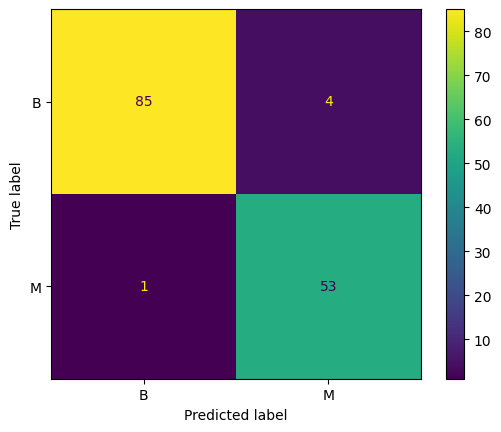

In [ ]:
# on tuned logreg
tuned_pred = logreg_best_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, tuned_pred);

### d) In a text cell, address these questions for your logistic regression models:


Which hyperparameters did you tune?

two params are tuned 
- C with a new list of [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000],
- penalty became ['l1', 'l2']

What values for those hyperparameters led to the best-tuned model?

There is no significant difference on accuracy between thos two, but the best model is actually the default logreg model since it has a slightly higher accuracy .979 vs tuned .972 . The main difference is the former only had default penalty of L2 but the latter chosed L1 through GS. Whilst usually L2 tend to generate a better accuracy.

## 2) K-Nearest Neighbors (KNN)

### a) Start by creating and evaluating a default knn model using appropriate metrics and a confusion matrix


In [ ]:
# Make an instance of the model with default parameters
knn = KNeighborsClassifier()

# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()

# Put scaler and model in a pipeline
knn_pipe = make_pipeline(scaler, knn)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

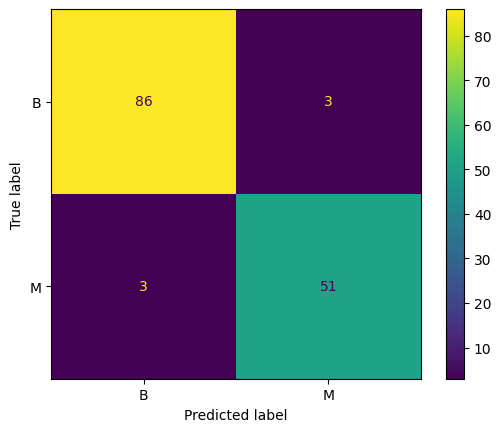

In [ ]:
# class predictions (not predicted probabilities)
knn_pred = knn_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred);

In [ ]:
evluate_classification(knn_pipe, X_train, X_test, y_train, y_test)

Training Accuracy: 0.981
Test Accuracy: 0.958


### b) The, use GridSearchCV to tune the model.

In [ ]:
params = {'n_neighbors' : [5,7,9,11,13,15],
          'weights' : ['uniform','distance'],
          'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params)
knn_gs.fit(X_train, y_train)

knn_gs.best_estimator_

KNeighborsClassifier(metric='manhattan', weights='distance')

In [ ]:
print(knn_gs.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
knn_best_model = knn_gs.best_estimator_
knn_best_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [ ]:
evluate_classification(knn_best_model, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.818


### c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

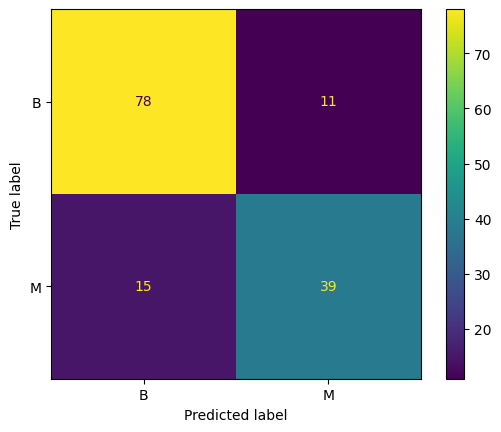

In [ ]:
# on tuned knn
tuned_knn_pred = knn_best_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, tuned_knn_pred);

### d) In a text cell, address these questions for your KNN models:

Which hyperparameters did you tune?

'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'

params above was the results selected from GS.

What values for those hyperparameters led to the best-tuned model?

The best model is actually the default logreg model since it has a slightly higher accuracy .958 vs tuned .951 . Maybe the main difference is the former used the default minkowski in metric, but the latter chosed manhattan through GS. However, still not much differences between two accuracies.

### 3) Random Forest



a) Start by creating and evaluating a default random forest model using appropriate metrics and a confusion matrix

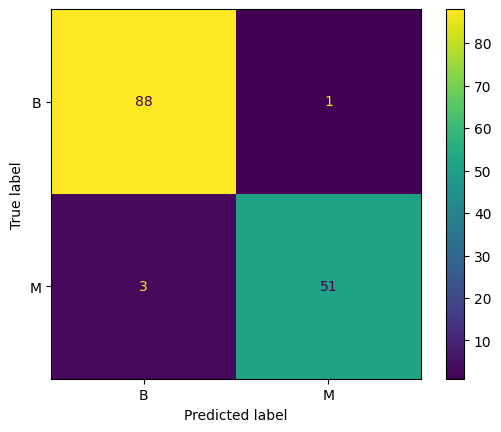

In [ ]:
# Make an instance of the model with default parameters
rf = RandomForestClassifier()
scaler = StandardScaler()
# Put scaler and model in a pipeline
rf_pipe = make_pipeline(scaler, rf)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
rf_pipe.fit(X_train, y_train)
# class predictions (not predicted probabilities)
rf_pred = rf_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred);

In [ ]:
evluate_classification(rf_pipe, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.972


b) The, use GridSearchCV to tune the model.

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

11

In [ ]:
params = {'max_depth': [1, max(est_depths)],
          'n_estimators': [20, 50, 100, 200, 500, 1000],
          'criterion': ['gini', 'entropy', "log_loss"],
          "max_features" : ["sqrt", "log2", None]} #default=”sqrt”
tuned_rf = RandomForestClassifier()
tuned_rf_gs = GridSearchCV(tuned_rf, params)
tuned_rf_gs.fit(X_train, y_train)

tuned_rf_gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       n_estimators=500)

In [ ]:
print(tuned_rf_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'log2', 'n_estimators': 500}


In [ ]:
rf_best_model = tuned_rf_gs.best_estimator_
rf_best_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       n_estimators=500)

In [ ]:
evluate_classification(rf_best_model, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Test Accuracy: 0.972


### c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

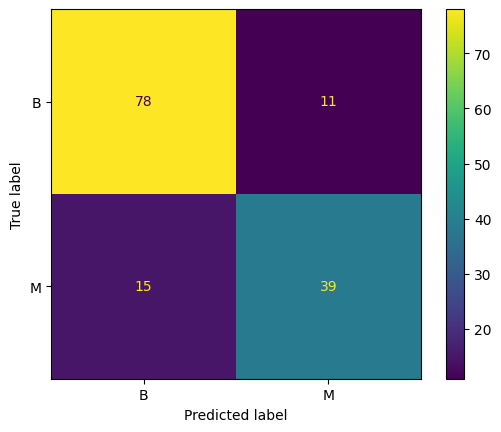

In [ ]:
# on tuned rf
tuned_rf_pred = knn_best_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, tuned_rf_pred);

### d) In a text cell, address these questions for your random forest models:

Which hyperparameters did you tune?

'max_depth': [1, max(est_depths)],
'n_estimators': [20, 50, 100, 200, 500, 1000],
'criterion': ['gini', 'entropy', "log_loss"],
"max_features" : ["sqrt", "log2", None]}

What values for those hyperparameters led to the best-tuned model?

Both my default and tuned RF model have the same accuracy of .972

### 4) Answer these questions in a text cell at the end of your notebook:

What do 'false positives' and 'false negatives' mean for this problem? Which is worse?


false positives: also known as type 1 error. An example of this is that people diagnosed with cancer but in reality they do not have cancer.

false negatives: also known as type 2 error as this is definitely worse since it suggests people with cancer but it was not diagnosed

Which of your models would you recommend for production? Which metric or metrics did you use to decide that, and why?

Looking at accuracy, default logreg model has the highest accuracy .979 among 6 models we used.